## Compare Trusted API Categories to Shallalist and Model Predictions for comScore 2004

comScore maintains a panel of about 100,000 users. And it sells anonymized domain level browsing data of these users. A few years ago, to learn about the browsing behavior of these users, we used the [TrustedSource API](https://www.trustedsource.org/?p=mcafee), mantained by McAfee, to get the the category of content for all the unique domains. (The script for getting the data is posted [here](https://github.com/themains/trusted). And the data can be downloaded from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/BPS1OK).

So when we developed pydomains, we thought about checking how the categories obtained using Shallalist measure up against the TrustedSource API. There are some reasons to expect that things won't turn out well. A bunch of time has passed, the categorization scheme is a bit different, and for some sites similar people will assign different labels. But it is a useful exercise. We compare the TrustedSource API results to both the Shallalist categories and the predicted labels obtained from the Shallalist model. To do that, we first got the category of content hosted by the domain using all the methods in pydomain for all the unique domains in comScore 2004. See the script [here](https://raw.githubusercontent.com/themains/pydomains/master/pydomains/app/comscore-2004.ipynb). We will post the data to https://doi.org/10.7910/DVN/DXSNFA.


In [1]:
import pandas as pd

### Load Shallalist Categories and Predicted Labels

In [2]:
# Load data with shallalist categories and the predicted labels using the Shallalist model

df = pd.read_csv('/opt/data/comscore/pydomains/cs2004_unique_domains_pydomains.csv.bz2', usecols = ['domain_names', 'shalla_2017_cat', 'pred_shalla_2017_lab'])
df.columns = ['domain_name', 'pred_shalla_2017_lab', 'shalla_2017_cat']

# Top Category in Shallalist
df['shalla_2017_top_cat'] = df['shalla_2017_cat'].apply(lambda c: c.split('|')[0] if not pd.isnull(c) else 'UNKNOWN')

# Predicted Category based on the Shallalist model
df['pred_shalla_2017_top_lab'] = df['pred_shalla_2017_lab'].apply(lambda c: c.split('|')[0] if not pd.isnull(c) else 'UNKNOWN')
df

,domain_name,pred_shalla_2017_lab,shalla_2017_cat,shalla_2017_top_cat,pred_shalla_2017_top_lab
0,2o7.net,redirector,tracker,tracker,redirector
1,aol.com,shopping,news|isp,news,shopping
2,googlesyndication.com-o02,porn,NaN,UNKNOWN,porn
3,adultfriendfinder.com,porn,porn|dating,porn,porn
4,adzones.com,shopping,adv,adv,shopping
...,...,...,...,...,...
1011140,auctionschools.com,shopping,NaN,UNKNOWN,shopping
1011141,rockgarden.com,recreation/travel,NaN,UNKNOWN,recreation/travel
1011142,aaarim.com,shopping,NaN,UNKNOWN,shopping
1011143,67.97.218.140,porn,NaN,UNKNOWN,porn


### Load Trusted API

In [3]:
df2 = pd.read_csv('/opt/data/comscore/pydomains/comScore_unique_2004.csv')
df2.columns = ['domain_name', 'url_class']

## We are going to filter on domains for which the category is known
df2 = df2.loc[df2['url_class'] != 'UNKNOWN']
df2

,domain_name,url_class
1,rrdsb.com,Education/Reference
2,hotresume.com,Job Search
3,mdr.org,Health
4,addressamerica.com,Non-Profit/Advocacy/NGO
5,oliebollen.com,Online Shopping
...,...,...
1011103,swubi.com,Portal Sites
1011104,hardbodeez.com,Entertainment
1011106,iprofitsystems.com,Software/Hardware
1011107,kuoni.co.uk,Travel


### Left Join on the filtered comScore data

In [4]:
mdf = df2.merge(df, how='left', on='domain_name')
mdf

,domain_name,url_class,pred_shalla_2017_lab,shalla_2017_cat,shalla_2017_top_cat,pred_shalla_2017_top_lab
0,rrdsb.com,Education/Reference,others,NaN,UNKNOWN,others
1,hotresume.com,Job Search,porn,porn,porn,porn
2,mdr.org,Health,recreation/sports,NaN,UNKNOWN,recreation/sports
3,addressamerica.com,Non-Profit/Advocacy/NGO,porn,NaN,UNKNOWN,porn
4,oliebollen.com,Online Shopping,porn,shopping,shopping,porn
...,...,...,...,...,...,...
853297,swubi.com,Portal Sites,porn,NaN,UNKNOWN,porn
853298,hardbodeez.com,Entertainment,porn,NaN,UNKNOWN,porn
853299,iprofitsystems.com,Software/Hardware,shopping,NaN,UNKNOWN,shopping
853300,kuoni.co.uk,Travel,shopping,recreation/travel,recreation/travel,shopping


### Top 10 categories in comScore 2004 based on Trusted API

In [5]:
gdf1 = df2.groupby('url_class').agg({'url_class': 'count'})
gdf1.columns = ['percent']
gdf1['percent'] = gdf1 * 100.0 / gdf1.sum()
gdf1.sort_values('percent', ascending=False)[:10]

,percent
url_class,
Pornography,18.099709
Online Shopping,9.299063
Entertainment,7.219961
Business,5.893583
Marketing/Merchandising,4.548922
Education/Reference,4.467826
Internet Services,4.178713
Travel,3.159729
Health,3.111680


### Top 10 categories in comScore 2004 based on Shallalist

In [6]:
gdf = df.groupby('shalla_2017_top_cat').agg({'shalla_2017_top_cat': 'count'})
gdf.columns = ['percent']
gdf['percent'] = gdf * 100.0 / gdf.sum()
gdf.sort_values('percent', ascending=False)[:10]

,percent
shalla_2017_top_cat,
UNKNOWN,78.072482
porn,12.278061
shopping,3.134071
news,1.424128
recreation/travel,1.166598
recreation/sports,1.124863
education/schools,0.290759
hobby/pets,0.285122
spyware,0.235476


### Top 10 categories in comScore 2004 based on the Shallalist Model

In [7]:
gdf2 = df.groupby('pred_shalla_2017_top_lab').agg({'pred_shalla_2017_top_lab': 'count'})
gdf2.columns = ['percent']
gdf2['percent'] = gdf2 * 100.0 / gdf2.sum()
gdf2.sort_values('percent', ascending=False)[:10]

,percent
pred_shalla_2017_top_lab,
porn,43.971438
shopping,25.452037
others,9.020071
recreation/sports,7.210835
recreation/travel,6.364666
anonvpn,1.246409
hobby/games-online,0.700987
gamble,0.632847
music,0.583695


In [8]:
# Fix Category Mapping

mapping = {'porn': 'Pornography',  'shopping': 'Online Shopping', 'education/schools': 'Education/Reference', 'recreation/travel': 'Travel', 'UNKNOWN': 'UNKNOWN'}

def remap_trusted_category(lab):
    if lab in mapping.values():
        return lab
    else:
        return 'OTHERS'

def remap_shalla_category(lab):
    if lab in mapping:
        return mapping[lab]
    else:
        return 'OTHERS'

mdf['trusted_lab'] = mdf.url_class.apply(lambda c: remap_trusted_category(c))
mdf['shalla_lab'] = mdf.shalla_2017_top_cat.apply(lambda c: remap_shalla_category(c))
mdf['predict_shalla_lab'] = mdf.pred_shalla_2017_top_lab.apply(lambda c: remap_shalla_category(c))
mdf

,domain_name,url_class,pred_shalla_2017_lab,shalla_2017_cat,shalla_2017_top_cat,pred_shalla_2017_top_lab,trusted_lab,shalla_lab,predict_shalla_lab
0,rrdsb.com,Education/Reference,others,NaN,UNKNOWN,others,Education/Reference,UNKNOWN,OTHERS
1,hotresume.com,Job Search,porn,porn,porn,porn,OTHERS,Pornography,Pornography
2,mdr.org,Health,recreation/sports,NaN,UNKNOWN,recreation/sports,OTHERS,UNKNOWN,OTHERS
3,addressamerica.com,Non-Profit/Advocacy/NGO,porn,NaN,UNKNOWN,porn,OTHERS,UNKNOWN,Pornography
4,oliebollen.com,Online Shopping,porn,shopping,shopping,porn,Online Shopping,Online Shopping,Pornography
...,...,...,...,...,...,...,...,...,...
853297,swubi.com,Portal Sites,porn,NaN,UNKNOWN,porn,OTHERS,UNKNOWN,Pornography
853298,hardbodeez.com,Entertainment,porn,NaN,UNKNOWN,porn,OTHERS,UNKNOWN,Pornography
853299,iprofitsystems.com,Software/Hardware,shopping,NaN,UNKNOWN,shopping,OTHERS,UNKNOWN,Online Shopping
853300,kuoni.co.uk,Travel,shopping,recreation/travel,recreation/travel,shopping,Travel,Travel,Online Shopping


## Trusted API vs. Shallalist

Confusion matrix:
Predicted            Education/Reference  OTHERS  Online Shopping  \
Actual                                                              
Education/Reference                 2899     915              598   
OTHERS                                40   46721            14752   
Online Shopping                        0    1860            15903   
Pornography                            0     550               69   
Travel                                 0     754              131   
__all__                             2939   50800            31453   

Predicted            Pornography  Travel  __all__  
Actual                                             
Education/Reference           99     156     4667  
OTHERS                     14431    2982    78926  
Online Shopping             2115     233    20111  
Pornography               106837      13   107469  
Travel                        99    8381     9365  
__all__                   123581   11765   220538  


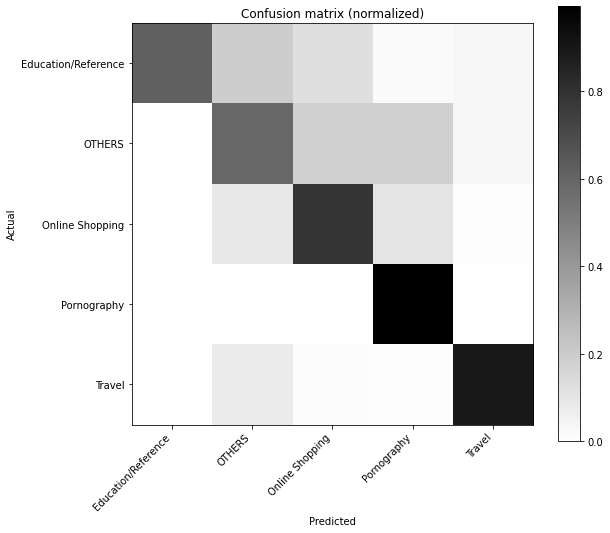

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_confusion import ConfusionMatrix

# We are going to take out uknown for now because all it shows is that coverage of shallalist is worse than TrustedAPI.
# It is something we know from above.
cm = ConfusionMatrix(mdf[mdf.shalla_lab != 'UNKNOWN'].trusted_lab, mdf[mdf.shalla_lab != 'UNKNOWN'].shalla_lab)
print("Confusion matrix:\n%s" % cm)
cm.plot(normalized=True)

## Trusted API vs. Shallalist Prediction Model

Confusion matrix:
Predicted            Education/Reference  OTHERS  Online Shopping  \
Actual                                                              
Education/Reference                 4950   11797             8783   
OTHERS                               538  163748           160754   
Online Shopping                        8   11265            40209   
Pornography                            8    6841             9438   
Travel                                18    3178             4623   
__all__                             5522  196829           223807   

Predicted            Pornography  Travel  __all__  
Actual                                             
Education/Reference        10396    2198    38124  
OTHERS                    194688   34694   554422  
Online Shopping            23391    4476    79349  
Pornography               135891    2267   154445  
Travel                      4504   14639    26962  
__all__                   368870   58274   853302  


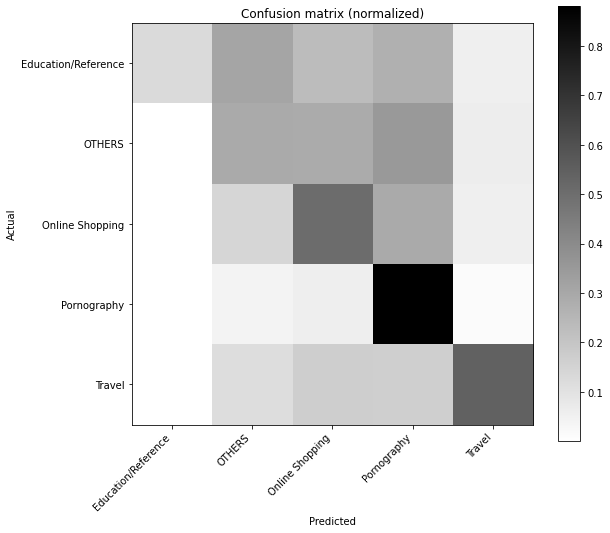

In [10]:
cm = ConfusionMatrix(mdf.trusted_lab, mdf.predict_shalla_lab)
print("Confusion matrix:\n%s" % cm)
cm.plot(normalized=True)